In [2]:
%pylab inline
import galsim
import numpy as np
import astropy.io.fits as pyfits

import fpfsBase

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd wrkDir/FPFS2/sim

/lustre/work/xiangchong.li/work/FPFS2/sim


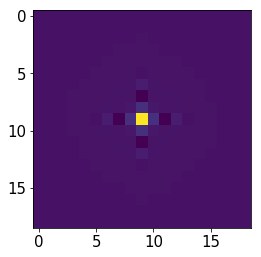

In [147]:
corHSC      =   pyfits.getdata('./corPre/correlationHSCY1.fits')
plt.imshow(corHSC)

In [141]:
ngrid       =   64
nx=ngrid*4
ny=ngrid*4
a=3

x=np.fft.fftfreq(nx)*nx/4.
y=np.fft.fftfreq(ny)*ny/4.
X,Y=np.meshgrid(x,y)
img=np.sinc(X)*np.sinc(X/a)*np.sinc(Y)*np.sinc(Y/a)
img[int(a)*4:ny-int(a)*4,int(a)*4:nx-int(a)*4]=0.
power=np.abs(np.fft.fft2(img))**2.
auto=np.fft.ifft2(power).real
out=np.fft.fftshift(auto)[::4,::4][ngrid//2-9:ngrid//2+10,ngrid//2-9:ngrid//2+10]

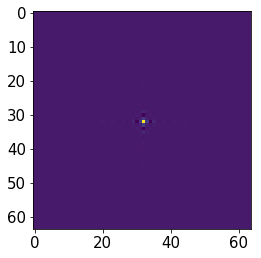

In [142]:
plt.imshow(np.fft.fftshift(auto)[::4,::4])

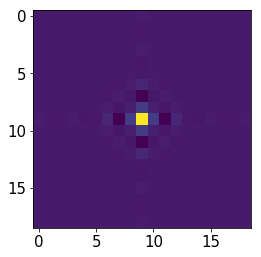

In [145]:
plt.imshow(out)
pyfits.writeto('./corPre/correlationL3.fits',out)